# Imaging systematic mitigation: the QSO case

**author:** Edmond Chaussidon (CEA Saclay)

**mail:** edmond.chaussidon@cea.fr

This notebook is based on the test case which are saved in `regressis/tests/test_data/`.

In [1]:
import os
import logging

from regressis import PhotometricDataFrame, Regression, DR9Footprint
from regressis.utils import setup_logging, setup_mplstyle

In [2]:
logger = logging.getLogger('Notebook')
setup_logging()

# On NERSC, you may need to load tex with `module load texlive`
# With you don't want please comment the following line
setup_mplstyle()

In [3]:
%matplotlib inline 


## 1. Load data:


In [4]:
# Information about version (SV3 / MAIN / DA02 / Y1 / ...) and the tracer chosen:
version, tracer, suffix_tracer = 'SV3', 'QSO', ''

# Load DR9 footprint:
dr9_footprint = DR9Footprint(256, mask_lmc=True, clear_south=True, mask_around_des=True, cut_desi=False)

# Set parameters for the dataframe:
# You can save some figures setting 'output_dir' not None
params = dict()

params['data_dir'] = '../regressis/tests/test_data'
params['output_dir'] = None

params['use_median'] = False
params['use_new_norm'] = True

params['regions'] = ['North', 'South', 'Des']

# Build PhotometricDataFrame class:
dataframe = PhotometricDataFrame(version, tracer, dr9_footprint, suffix_tracer, **params)

# Load features from params['data_dir']:
logger.info('Features')
dataframe.set_features() 

# Load targets from params['data_dir'] and default fracarea (FRACAREA_12290 from features):
logger.info('Targets')
dataframe.set_targets()

# Select which pixels will be kept for the training and compute the normalized density on each selected params['regions']:
logger.info('Build')
dataframe.build(cut_fracarea=True)

[000000.02] 23-05-30 01:32  Footprint            INFO     Load DR9 footprint with nside=256, mask_lmc=True, clear_south=True, mask_around_des=True and cut_desi=False
[000000.03] 23-05-30 01:32  DataFrame            INFO     version: SV3 -- tracer: QSO -- regions: ['North', 'South', 'Des']
[000000.03] 23-05-30 01:32  Notebook             INFO     Features
[000000.03] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/pixweight-dr9-256.fits
[000000.28] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/sagittarius_stream_256.npy
[000000.29] 23-05-30 01:32  DataFrame            INFO     Sanity check: number of NaNs in features: 0
[000000.29] 23-05-30 01:32  Notebook             INFO     Targets
[000000.29] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/SV3_QSO_256.npy
[000000.30] 23-05-30 01:32  DataFrame            INFO     Do not find corresponding fracarea map --> use FRACAREA_12290 as default fr

In [5]:
# Features, targets, fracarea can be pass 
# either given the array containing the data 
# or given the correct path where the file is (features is .fits and sgr_stream/targets/fracarea is .npy)
# can also load external / additional features ! (use sel_columns_external to extract them from the file)

# Load features from params['data_dir']:
logger.info('Features')
feature_path = '../regressis/tests/test_data/pixweight-dr9-256.fits'
external_feature_path = '/global/cfs/cdirs/desi/survey/catalogs/pixweight_maps_all/pixweight_external.fits'
stream_path = '../regressis/tests/test_data/sagittarius_stream_256.npy'
use_stream = True # is set False, do not load sgr stream feature map.
dataframe.set_features(pixmap=feature_path, pixmap_external=external_feature_path, use_sgr_stream=use_stream, sgr_stream=stream_path) 

# Load targets from params['data_dir'] and default fracarea (FRACAREA_12290 from features):
logger.info('Targets')
target_path = '../regressis/tests/test_data/SV3_QSO_256.npy'
dataframe.set_targets(targets=target_path, fracarea=None)

# Select which pixels will be kept for the training and compute the normalized density on each selected params['regions']:
logger.info('Build')
dataframe.build(cut_fracarea=True)

[000002.56] 23-05-30 01:32  Notebook             INFO     Features
[000002.56] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/pixweight-dr9-256.fits
[000002.80] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/sagittarius_stream_256.npy
[000002.81] 23-05-30 01:32  DataFrame            INFO     Read /global/cfs/cdirs/desi/survey/catalogs/pixweight_maps_all/pixweight_external.fits
[000003.68] 23-05-30 01:32  DataFrame            INFO     Sanity check: number of NaNs in features: 2382
[000003.68] 23-05-30 01:32  Notebook             INFO     Targets
[000003.68] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/SV3_QSO_256.npy
[000003.69] 23-05-30 01:32  DataFrame            INFO     Do not find corresponding fracarea map --> use FRACAREA_12290 as default fracarea
[000003.69] 23-05-30 01:32  DataFrame            INFO     Read ../regressis/tests/test_data/pixweight-dr9-256.fits
[000003.73] 23-05-30

In [6]:
# features:
print('Everything is healpix map in nested order at nside={dataframe.nside}')
print(dataframe.features)
print('')

# normalized targets:
print(dataframe.density)

Everything is healpix map in nested order at nside={dataframe.nside}
           STARDENS       EBV   STREAM  PSFSIZE_G  PSFSIZE_R  PSFSIZE_Z  \
0        457.527588  0.089464  0.25416   1.406588   1.153856   1.017720   
1        495.654877  0.108131  0.25416   1.419737   1.163173   1.011294   
2        324.082031  0.083504  0.27534   1.376193   1.163397   1.069558   
3        305.018402  0.090149  0.30711   1.406958   1.181453   1.072068   
4        590.973145  0.106761  0.24357   1.503215   1.211724   1.008636   
...             ...       ...      ...        ...        ...        ...   
786427  1982.619507  0.097943  0.00000   1.700687   1.556513   1.301301   
786428  2211.383301  0.075156  0.00000   1.717183   1.507478   1.333628   
786429  2020.746826  0.074944  0.00000   1.736706   1.502010   1.341126   
786430  2039.810547  0.083280  0.00000   1.706566   1.558553   1.301865   
786431  2097.001465  0.083361  0.00000   1.691270   1.498084   1.346933   

         PSFDEPTH_G   PSFDEPTH

### 2. Run regression:

In [7]:
# Parametrization of regression and launch it:
# regressor could be 'RF', 'NN', 'LINEAR'
# suffix_regressor is used only to build the output directory (if is output_dir not None). 
# Useful to run different hyperparameters on the same dataset.

# Which features will be used during the regression. 
# Have to be loaded from feature_pixmap with dataframe.set_features(sel_columns).
feature_names = ['STARDENS', 'EBV', 'STREAM',
                 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_Z', 'PSFDEPTH_W1', 'PSFDEPTH_W2',
                 'PSFSIZE_G', 'PSFSIZE_R', 'PSFSIZE_Z']

# Some plots are drawn and saved if dataframe.output_dir is not None

# Use kfold training/eval to avoid overfitting !!
use_kfold = False

# If regressor_params is None, uses default parametrization defined in regression.py
# Update specific parameter with e.g. {'North':{'min_sample_leaf':20}}
regressor_params=None #{'North':{'min_sample_leaf':20}, 'Des':{'min_sample_leaf':40}}

# If nfold_params is None, uses default parametrization defined in regression.py
nfold_params = {'North':6, 'South':12, 'Des':6}

regression = Regression(dataframe, feature_names=feature_names,
                        regressor_params=regressor_params, nfold_params=nfold_params,
                        regressor='LINEAR', suffix_regressor='', use_kfold=use_kfold,
                        n_jobs=6, seed=123)

[000006.34] 23-05-30 01:32  Regression           INFO     We use the set of features: ['STARDENS', 'EBV', 'STREAM', 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_Z', 'PSFDEPTH_W1', 'PSFDEPTH_W2', 'PSFSIZE_G', 'PSFSIZE_R', 'PSFSIZE_Z']
[000006.34] 23-05-30 01:32  Regression           WARNING  k-fold training not used
[000007.01] 23-05-30 01:32  Regression           INFO       ** North :
[000007.09] 23-05-30 01:32  Regression           INFO         --> Sample size North: 96329 -- Total sample size: 358139 -- Training fraction: 26.90%
[000007.09] 23-05-30 01:32  Regression           INFO         --> Use k-fold training ? False
[000007.09] 23-05-30 01:32  Regression           INFO         --> Engine: LINEAR with params: {}
[000007.09] 23-05-30 01:32  Regression           INFO               --> All features (except the STREAM) are normalized and centered on the training footprint
[000007.11] 23-05-30 01:32  Regression           INFO               --> Mean of mean and std on the fold-training featur

In [8]:
# choose a specific savedir or default directory will be used (only available if dataframe.output_dir is not None)
wsys = regression.get_weight(save=False)

In [9]:
wsys.mean_density_region

{'North': 16.017785608640075,
 'South': 16.07805046054077,
 'Des': 15.315661089125255}

## 3. Some plots:

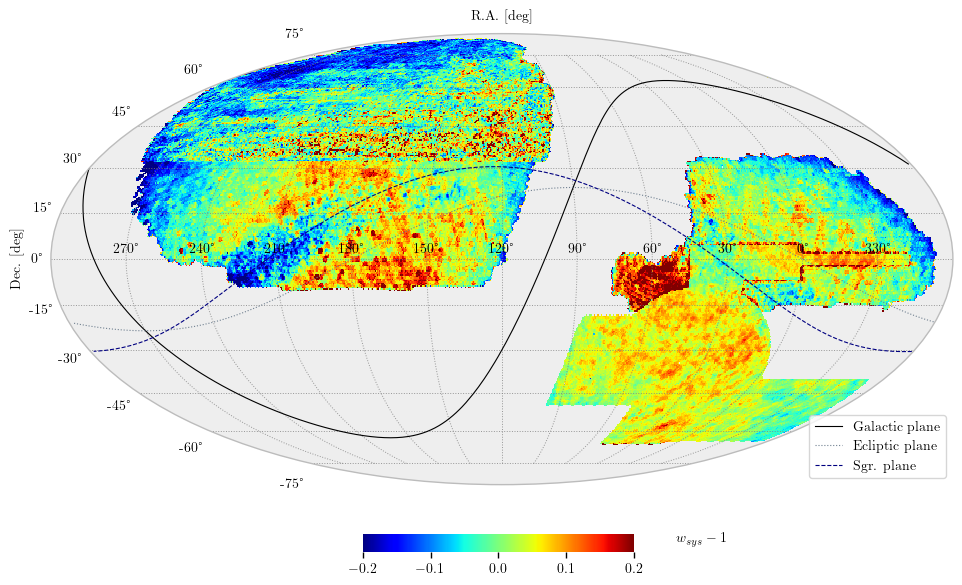

In [10]:
# Some utilitaries for plotting are provided in regressis/plots.py regressis/systematics.py

from regressis.plot import plot_moll
import numpy as np

# to avoid warning due to comparaison with np.nan values.
with np.errstate(divide='ignore', invalid='ignore'):
    plot_moll(wsys.map-1, min=-0.2, max=0.2, label='$w_{sys} - 1$',
              galactic_plane=True, ecliptic_plane=True, sgr_plane=True, labelpad=-30)

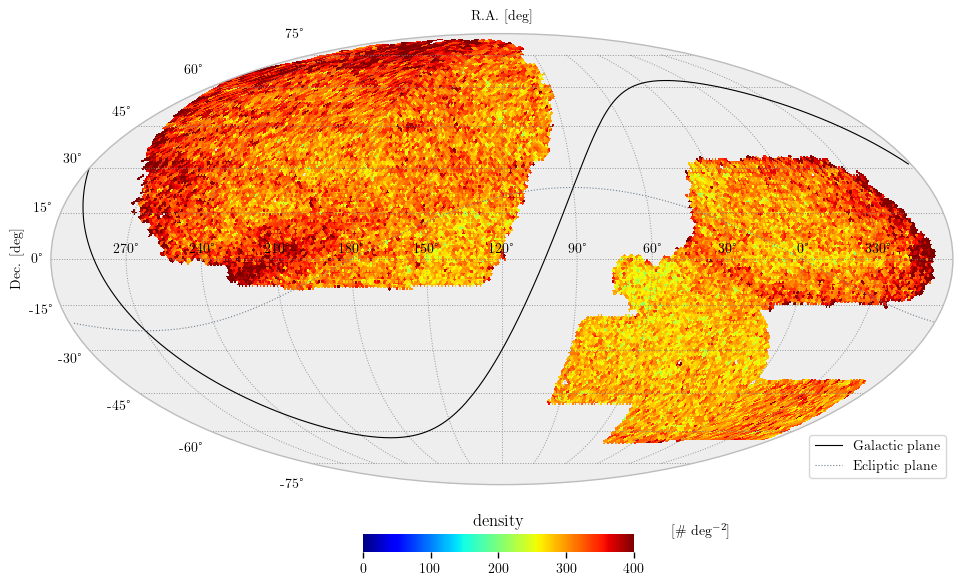

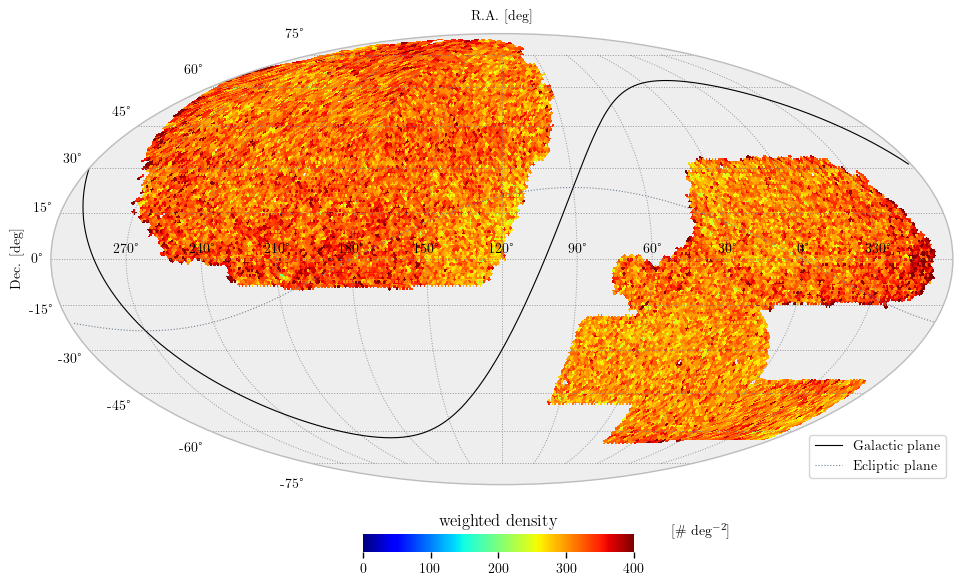

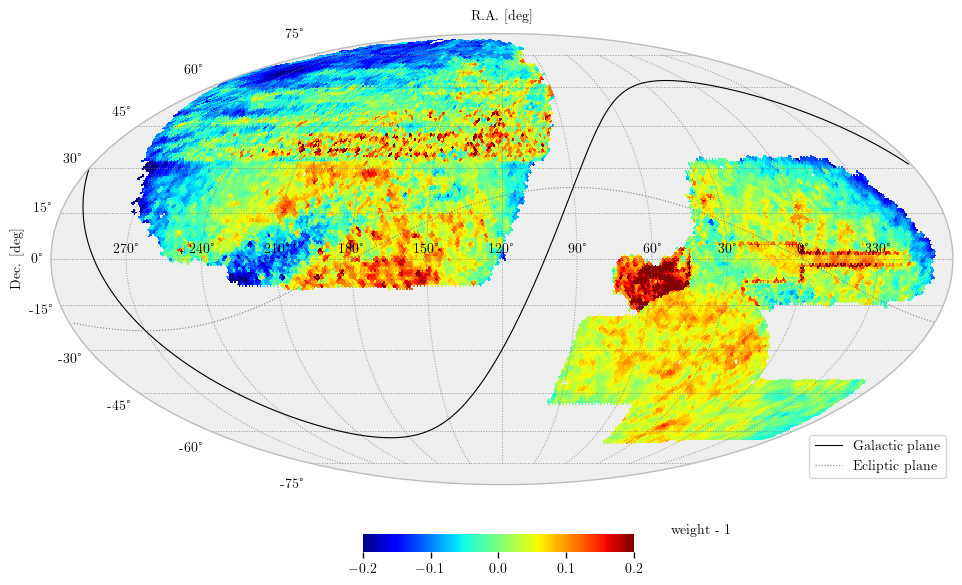

[000017.70] 23-05-30 01:33  Systematics          INFO     Work with North
[000018.33] 23-05-30 01:33  Systematics          INFO     Keep only pixels with fracarea > 0


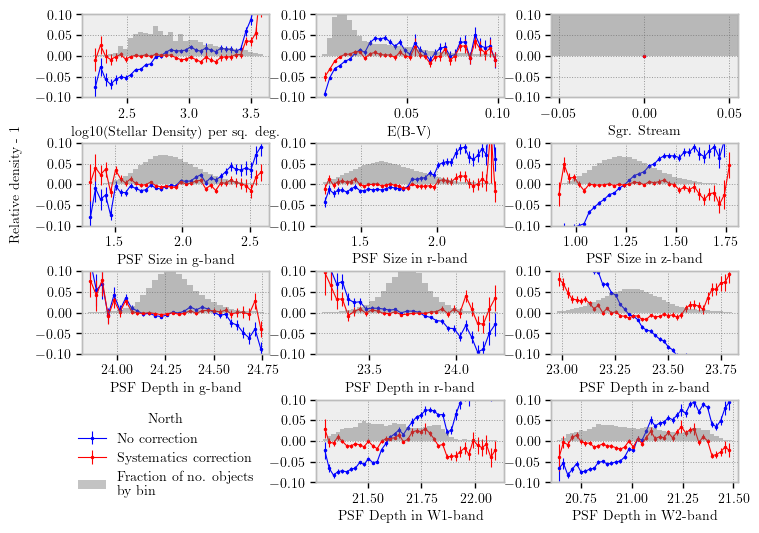

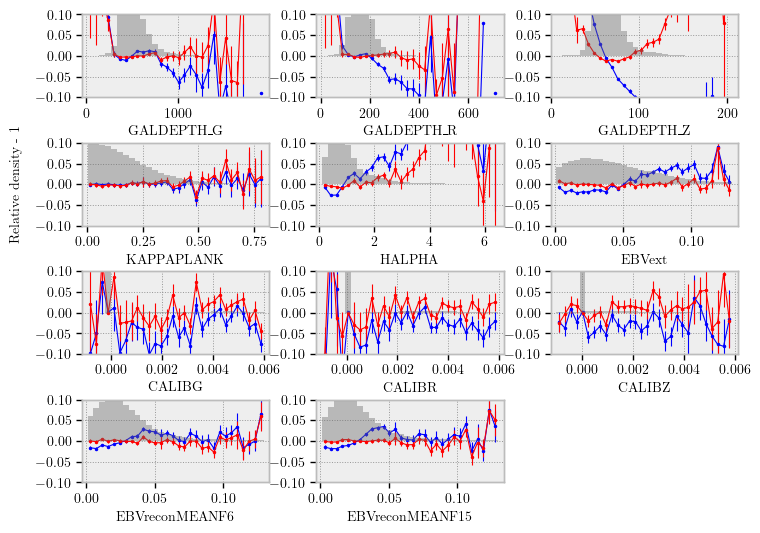

[000024.32] 23-05-30 01:33  Systematics          INFO     Work with South
[000024.89] 23-05-30 01:33  Systematics          INFO     Keep only pixels with fracarea > 0


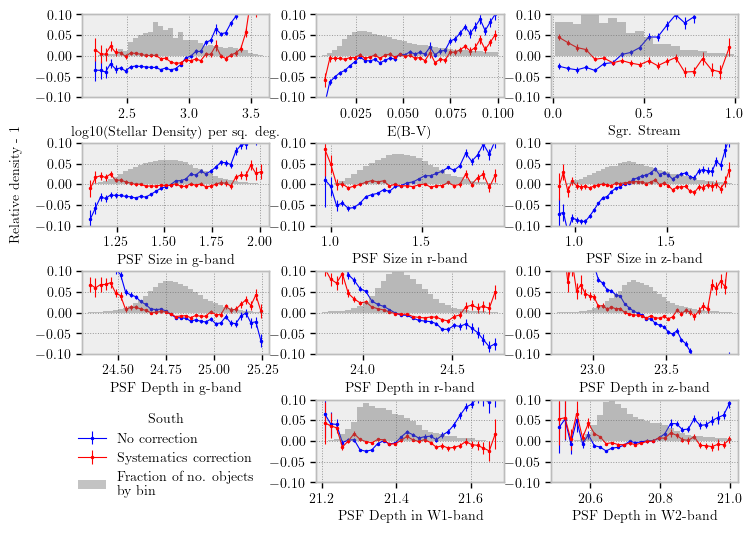

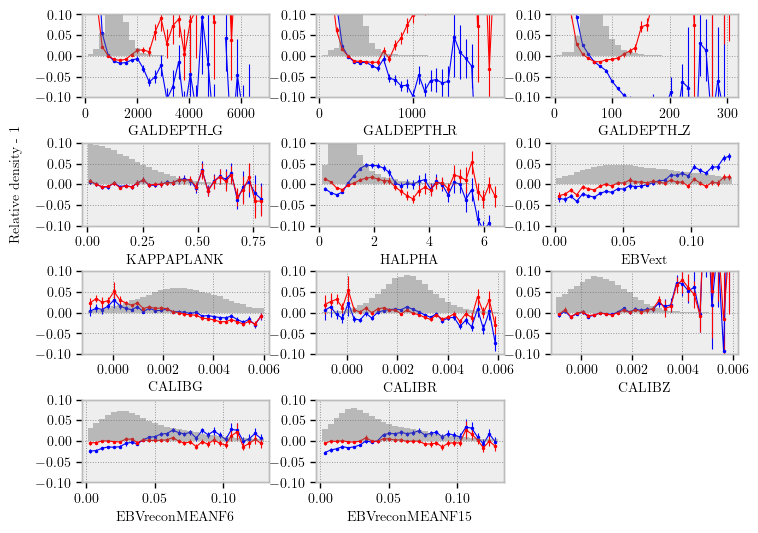

[000027.92] 23-05-30 01:33  Systematics          INFO     Work with Des
[000028.49] 23-05-30 01:33  Systematics          INFO     Keep only pixels with fracarea > 0


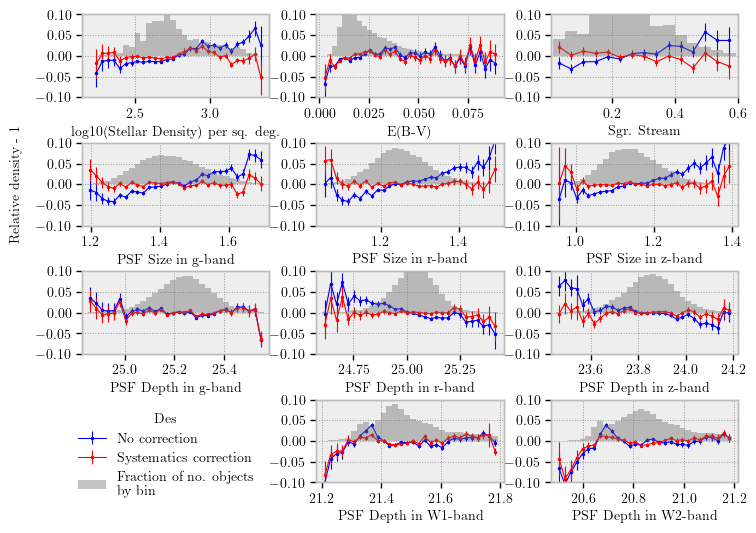

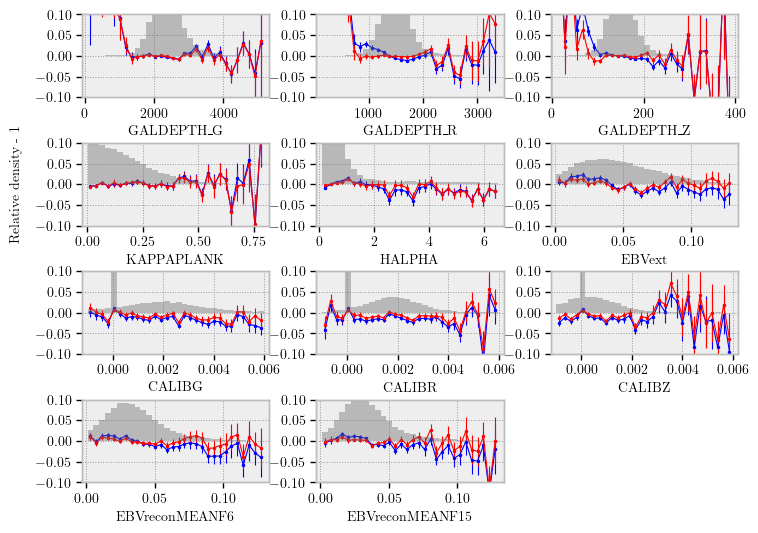

In [11]:
# Can also used pre-defined functions from regression class:
with np.errstate(divide='ignore', invalid='ignore'):
    regression.plot_maps_and_systematics(max_plot_cart=400, cut_fracarea=False, show=True, save=False, ax_lim=0.1)